In [ ]:
from packages import *
from base_time_series import *
from misc import *

In [ ]:
pot = pd.read_csv("data_3987.csv", sep=' ')
pot = pot.rename(columns={'STATIONS_ID': 'Station', 'MESS_DATUM': 'Date', 'TMK': 'Temp'})

pot.drop(pot.index[pot['Temp'] == "TMK"], inplace=True)
pot['Temp'] = pot['Temp'].astype(float)

stations =  pd.unique(pot['Station'])

pot['Date'] = pd.to_datetime(pot['Date'], infer_datetime_format=True)

pot['year'] = pd.DatetimeIndex(pot['Date']).year
pot['month'] = pd.DatetimeIndex(pot['Date']).month
pot['day'] = pd.DatetimeIndex(pot['Date']).day

temp = pot[pot['Station']== stations[40]] # Potsdam 3987
temp = temp[temp['year']>1949] #

temp.head(3)

,Station,Date,Temp,year,month,day
1671788,3987,1950-01-01,-3.7,1950,1,1
1671789,3987,1950-01-02,0.4,1950,1,2
1671790,3987,1950-01-03,2.1,1950,1,3


In [3]:
def detrend(df, datafr=True):
    
    if datafr:
        df.loc[(df.Temp < -100),'Temp']=np.nan
        yl = df['Temp'].to_numpy()
    else:
        yl = df.to_numpy()
    
    y366 = df.groupby(['month', 'day'], as_index=False)['Temp'].mean()
    
    y365 = y366.drop(y366[(y366.month == 2) & (y366.day == 29)].index)#
    y365 = y365['Temp'].tolist()
    
    y366 = y366['Temp'].tolist()
    y4 = y365 + y365 + y366 + y365
    ym = np.resize(y4, len(yl))
    ymf = savgol_filter(ym, 51, 3)
    
    yl2 = np.subtract(yl,ym)
    
    return yl2

No missing values :)


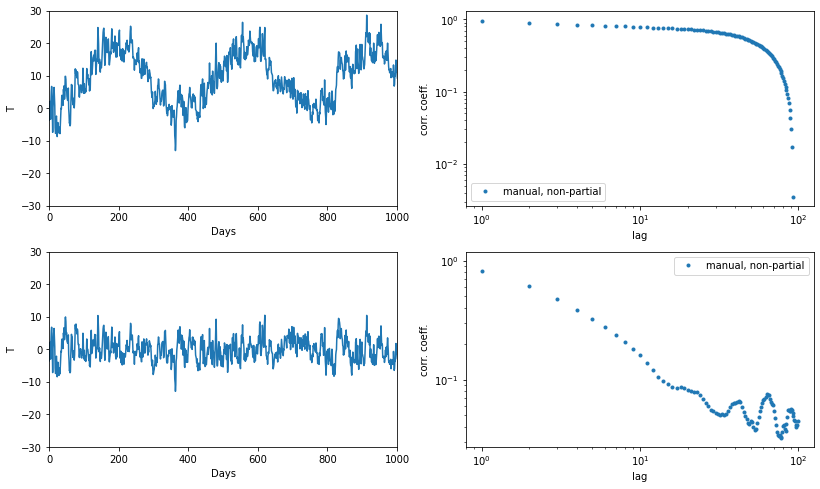

In [4]:
T_sin = temp # potsdam? 3987

try:
    date_start = pd.date_range(T_sin.Date.min(), T_sin.Date.max()).difference(T_sin.Date)[-1]
    T_sin = T_sin[T_sin['year']>date_start.year]
except IndexError:
    print("No missing values :)")
    pass

def func(x, a, b):
    return a * np.exp( b*x )

def autocorr2(x,lags):
    '''manualy compute, non partial'''

    mean=np.mean(x)
    var=np.var(x)
    xp=x-mean
    corr=[1. if l==0 else np.sum(xp[l:]*xp[:-l])/len(x)/var for l in lags]

    return np.array(corr)

fig, axs = plt.subplots(2, 2, figsize=(1.15*10, 1.15*6))

for i in range(2):
    
    if i == 0: y = T_sin['Temp'].to_numpy() 
    else: y = detrend(T_sin)   
        
    y = np.nan_to_num(y)

    x = np.linspace(0, len(y), len(y))
    
    axs[i,0].plot(y)
    axs[i,0].set_xlabel('Days')
    start = 0 
    axs[i,0].set_xlim(0+start,1000+start)
    axs[i,0].set_ylabel('T')
    axs[i,0].set_ylim(-30,30)

    lags=range(100)

    for funcii, labelii in zip([autocorr2], ['manual, non-partial']):

        cii=funcii(y,lags)

        axs[i,1].loglog(lags,cii, '.', label=labelii)

    axs[i,1].set_xlabel('lag')
    axs[i,1].set_ylabel('corr. coeff.')
    axs[i,1].legend() 

fig.tight_layout()

#fig.savefig('Detrended.png', format='png', dpi=95, bbox_inches="tight")

In [5]:
temp = detrend(temp)

In [6]:
df = pd.DataFrame({'T': temp})

df.to_csv('T_potsdam_1950_2022.csv', index=False)

mean =  0.6653306613226453
up_x - mean =  0.03259274357108899
mean - low_x =  0.01954349459797944
Area within FWHM =  0.6440665948132268
Upper Area within FWHM_up =  0.6195782168659398
Lower Area within FWHM_low =  0.9195239501374869
dfa3: mean =  0.6773547094188376
dfa3: up_x - mean =  0.09471689472206501
dfa3: mean - low_x =  0.045606339593497025


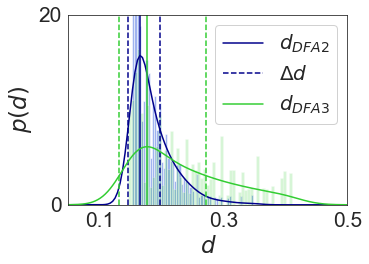

In [6]:
#rc('xtick', labelsize=19)
#rc('ytick', labelsize=19)
#rc('font', size=19)
#rc('axes', labelsize=19)

params = {'xtick.labelsize': 21, 
          'ytick.labelsize': 21,
          'legend.fontsize': 20,
          'axes.labelsize': 23,
          'font.size': 22,
          'legend.handlelength': 2}

f, ax = dfa_hist(temp, s=params)

#f.savefig('d_histogram_dfa23_potsdam_middle.png', format='png', dpi=115, bbox_inches="tight")

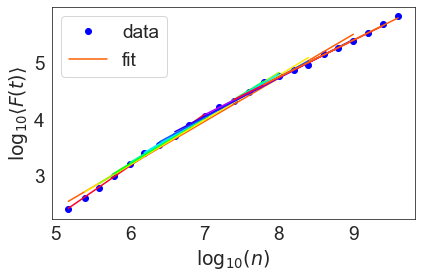

In [56]:
f, ax = plt.subplots(1, 1, figsize=(1.3*5, 1.3*3), sharey=False)
ax, d = dfa_fits(ax, temp, 3)

#f.savefig('ztest_ttest.png', bbox_inches='tight', format='png', dpi=120)

Text(0, 0.5, '$\\log_{10}F^2 (s)$')

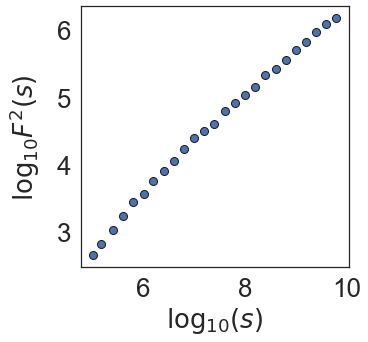

In [7]:
params = {'xtick.labelsize': 26, 
          'ytick.labelsize': 26,
          'legend.fontsize': 24,
          'axes.labelsize': 26,
          'axes.titlesize': 26,
          'font.size': 26,
          'legend.handlelength': 2}

sns.set_theme(style="white", rc=params)

f, ax = plt.subplots(1, 1, figsize=(4.8, 4.8), sharey=False)

region, scales, fluct, mean, error, lhs_arr, rhs_arr, slope, error, weights, offset = dfa_bradley(temp, 2, scale_lim=[5,10], P=2, plot='fits')

ax.plot(np.log2(scales), np.log2(fluct), 'bo', markersize=8, mec = 'k')

i = 20 #100 #20
    
x = region[:,0][lhs_arr[i]:rhs_arr[i]]
a, b = offset[i], slope[i]
y = a + b*x
    
#ax.plot(x, y, 'limegreen', linewidth=4) 
#ax.plot(x, y, 'orange', linewidth=4) 

#ax.set_title('DFA2', pad=10)
ax.set_xlabel(r'$\log_{10}(s)$')
ax.set_ylabel(r'$\log_{10}F^2 (s)$', labelpad=15)
#ax.legend()
#plt.show()

#f.savefig('DFA2_example_1_.png', bbox_inches='tight', format='png', dpi=120)

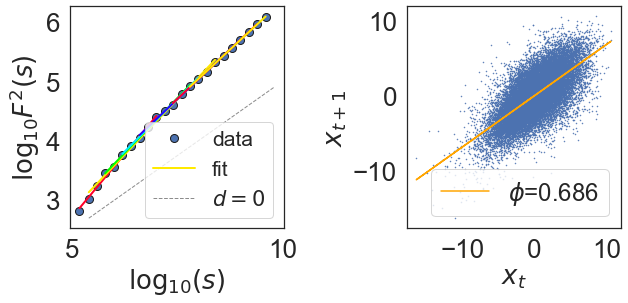

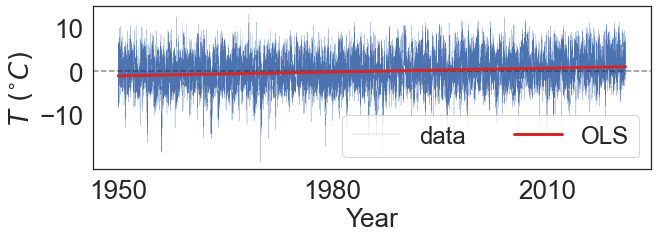

In [8]:
import misc; importlib.reload(misc)
from misc import *

params = {'xtick.labelsize': 26, 
          'ytick.labelsize': 26,
          'legend.fontsize': 24,
          'axes.labelsize': 26,
          'font.size': 26,
          'legend.handlelength': 2}

sns.set_theme(style="white", rc=params)
sns.mpl.rc("figure", figsize=(6, 6))

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(9.3, 4.8), sharey=False)  

ax1, d = dfa_fits(ax1, temp, 2, ref=True, leg_fs=21) 

ax2, phi = ar_fits(ax2, temp, d)

f.tight_layout()

#f.savefig('sig_d_phi_DFA2.png', bbox_inches='tight', format='png', dpi=120)

f, ax = plt.subplots(1, 1, figsize=(10, 3), sharey=False)  
ax, m, summary = trend_fits(ax, temp, show_var=False)

#0.690
#f.savefig('sig_trend.png', bbox_inches='tight', format='png', dpi=120)

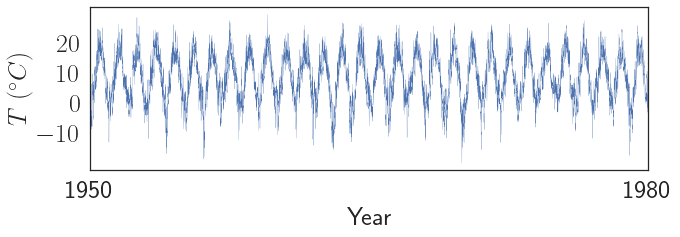

In [299]:
y = T_sin['Temp'].to_numpy()
f, ax = plt.subplots(1, 1, figsize=(10, 3), sharey=False)  
ax, m, summary = trend_fits(ax, y, show_var=False)
f.savefig('sig_trend_clean4.png', bbox_inches='tight', format='png', dpi=120)

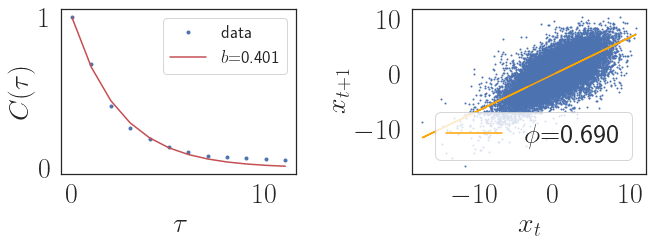

In [234]:
#d = mean - 0.5
diff = grlet_diff(temp, 10, d)
x1 = diff[:-1]
x2 = diff[1:]

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4), sharey=False)  
     
lags=range(12)
y = autocorr2(diff,lags)
ax1.plot(y, '.', label='data')    

ax1.set_xlabel(r'$\tau$')
ax1.set_ylabel(r'$C(\tau)$')
#ax1.grid()

def exp_func(x,a,b):
    return(a*np.exp(-b*x))

x = np.array(list(lags))
popt, pcov = scipy.optimize.curve_fit(exp_func, x, y) # bounds=(0, [1,0.001])
ax1.plot(x, exp_func(x, *popt), 'r', label=r'$b$=%3.3f' %popt[1]) 
ax1.legend(fontsize='18')
    
ax2.plot(x1, x2, '.', markersize='2')  
ax2.set_xlabel(r'$x_t$')
ax2.set_ylabel(r'$x_{t+1}$')
    
popt, pcov = scipy.optimize.curve_fit(line, x1, x2) # bounds=(0, [1,0.001])
ax2.plot(x1, line(x1, *popt), 'orange', label=r'$\phi$=%3.3f' %popt[1]) #a = popt, line(x, a)
ax2.legend() 

f.tight_layout()

#f.savefig('obtain_d_phi_DFA2.png', bbox_inches='tight', format='png', dpi=120)


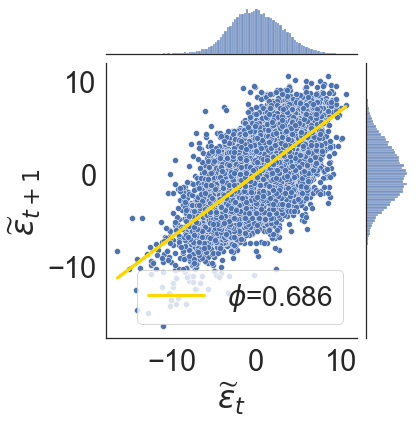

In [10]:
#sns.set(font_scale=2)

params = {'xtick.labelsize': 29, 
          'ytick.labelsize': 29,
          'legend.fontsize': 28,
          'axes.labelsize': 29,
          'font.size': 29,
          'legend.handlelength': 2}

sns.set_theme(style="white", rc=params)
sns.mpl.rc("figure", figsize=(6, 6))

diff = grlet_diff(temp, 1095, d)
x1 = diff[:-1]
x2 = diff[1:]

h = sns.jointplot(x=x1, y=x2, kind="scatter") # "scatter", "reg"
_ = h.set_axis_labels(r'$\widetilde{\epsilon}_t$', r'$\widetilde{\epsilon}_{t+1}$', fontsize=32) # , fontsize=24

popt, pcov = scipy.optimize.curve_fit(line, x1, x2) 

cax = h.ax_joint.plot(x1, line(x1, *popt), 'gold', linewidth=3, label=r'$\phi$=%3.3f' %popt[1])
h.ax_joint.legend() 

[-5.29774246e-04  6.83265938e-01  4.89647560e+00]


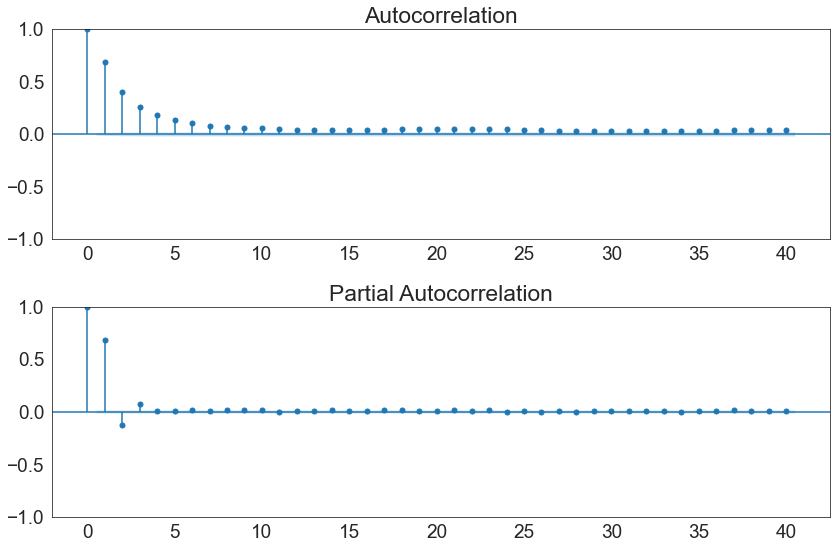

In [42]:
#plt.plot(diff)

fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(diff, lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(diff, lags=40, ax=ax2)
fig.tight_layout()

#look on semi logarithmic plot

from statsmodels.tsa.arima.model import ARIMA
arma_mod20 = ARIMA(diff, order=(1, 0, 0)).fit()
print(arma_mod20.params)

#Calculate AIC 
#https://www.statsmodels.org/stable/examples/notebooks/generated/autoregressions.html

In [10]:
from statsmodels.tsa.api import acf, graphics, pacf
from statsmodels.tsa.ar_model import AutoReg, ar_select_order

#sel = ar_select_order(diff, 13, old_names=False)
#sel.ar_lags
#res = sel.model.fit()
#print(res.summary())

mod = AutoReg(diff, 2, old_names=False)
res = mod.fit()
print(res.summary())

#AIC                         114149.439
#BIC                         114190.253

#Date:                Tue, 28 Jun 2022   AIC                         114651.695
#Time:                        00:39:38   BIC                         114676.184

                            AutoReg Model Results                             
Dep. Variable:                      y   No. Observations:                25923
Model:                     AutoReg(2)   Log Likelihood              -57111.750
Method:               Conditional MLE   S.D. of innovations              2.191
Date:                Tue, 15 Nov 2022   AIC                         114231.501
Time:                        17:51:57   BIC                         114264.152
Sample:                             2   HQIC                        114242.051
                                25923                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0002      0.014      0.012      0.990      -0.027       0.027
y.L1           0.6851      0.006    111.188      0.000       0.673       0.697
y.L2          -0.1257      0.006    -20.408      0.0

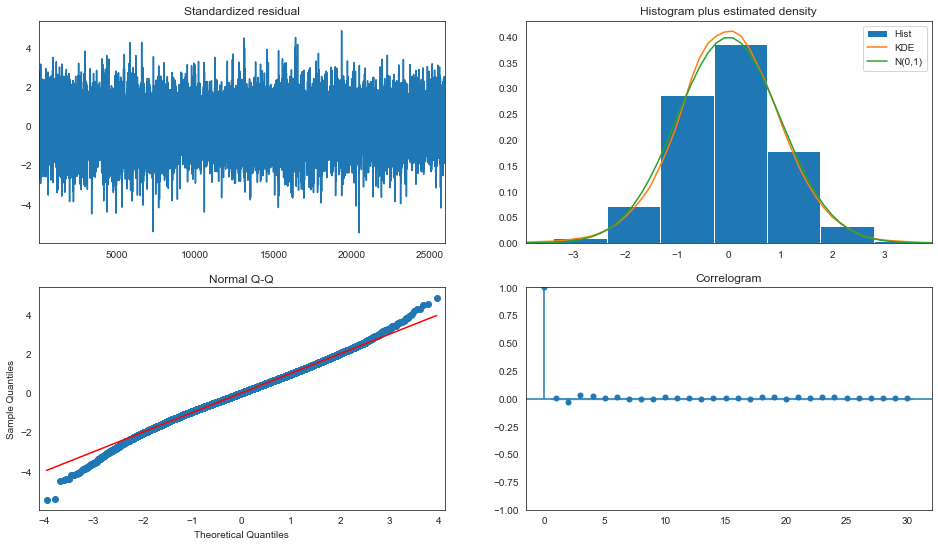

In [11]:
fig = plt.figure(figsize=(16, 9))
fig = res.plot_diagnostics(fig=fig, lags=30)

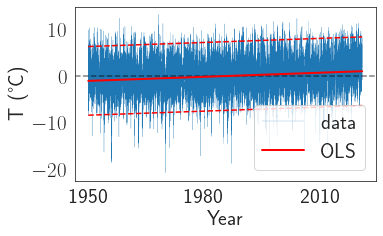

In [10]:
f, ax = plt.subplots(figsize=(0.9*6, 0.8*4))  
#f.savefig('pca_paper/potsdam_ols.png', format='png', dpi=105, bbox_inches="tight")

ax, m, summary = trend_fits(ax, temp)


In [43]:
from scipy import stats

def ztest_2(x1, value=0, alternative="two-sided"):

    x1 = np.asarray(x1)
    nobs1 = x1.shape[0]
    x1_mean = x1.mean(0)
    x1_var = x1.var(0)

    var_pooled = x1_var / (nobs1 - 1)

    std_diff = np.sqrt(var_pooled)

    zstat = (x1_mean - value) / std_diff
    
    if alternative in ["two-sided", "2-sided", "2s"]:
        pvalue = 2*(1 - stats.norm.cdf(np.abs(zstat)))
    elif alternative in ["larger", "l"]:
        pvalue = 1 - stats.norm.cdf(zstat)
    elif alternative in ["smaller", "s"]:
        pvalue = stats.norm.cdf(zstat)
    else:
        raise ValueError("invalid alternative")
        
    return(zstat, pvalue) # p = 1-st.t.cdf(x=t, df=49)

def ztest(x, value):
    
    x = np.asarray(x)
    mean = np.mean(x)  
    std_diff = np.std(x) 
    
    zstat = (mean - value) / std_diff
    pvalue = stats.norm.cdf(zstat)
        
    return(zstat, pvalue)

def ttest(x, value):
    
    x = np.asarray(x)
    mean = np.mean(x)
    std_diff = np.std(x) 
   
    tstat = abs(mean - value) / std_diff
    pvalue = 1 - stats.t.cdf(tstat, df=10000)
   
    return(tstat, pvalue)

def asymp(a, d, T):
    
    f = ((1+a)/((1-a)*(2*hyp2f1(1,d,1-d,a) - 1)))*((36*(1-2*d)*gamma(1-d))/(d*(1+2*d)*(3+2*d)*gamma(d)))
    var = f*(T**(2*d-3))
    
    return(var)

def ttest_an(a, d, var, value): 
    
    N, mean = 25567, 0
    std_diff = np.sqrt(asymp(a, d, N)*var)
   
    tstat = abs(mean - value) / std_diff
    pvalue = 1 - stats.t.cdf(tstat, df=10000)
    
    vtr = asymp(a, d, N)*var
   
    return(pvalue, vtr)

lower =  -0.09449314082479214  lower a =  -0.1909927108776999
upper =  0.09695522243084577  upper a =  0.18368306399964462


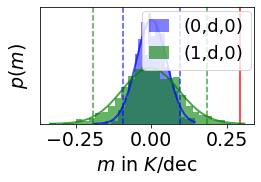

In [9]:
rc('xtick', labelsize=19)
rc('ytick', labelsize=19)
rc('font', size=19)
rc('axes', labelsize=19)

params = {'legend.fontsize': 18,
          'legend.handlelength': 1.1}
plt.rcParams.update(params)

f, ax1 = plt.subplots(1, 1, figsize=(4, 2.9), sharey=False) # 2.9, 3.5

a = 10*365.25  
trends_, a_tr_, tr_ = a*np.array(trends), a*np.array(a_tr), a*tr
    
n, bins, patches = ax1.hist(trends_, density=True, bins=30, color='b', alpha=0.5, label='(0,d,0)')      
na, binsa, patchesa = ax1.hist(a_tr_, density=True, bins=30, color='g', alpha=0.6, label='(1,d,0)')  
ax1.set_ylabel(r'$p(m)$', labelpad=10)
ax1.set_xlabel(r'$m$ in $K$/dec'); 
ax1.axvline(tr_, color='r', ls='-', alpha=0.7, linewidth=2) # 8.008e-05
    
pred_ols = res.get_prediction()
iv_l = pred_ols.summary_frame()["obs_ci_lower"]
iv_u = pred_ols.summary_frame()["obs_ci_upper"]

alpha = 0.95
p = ((1.0-alpha)/2.0) * 100
lower =  np.percentile(trends_, p)
lowera =  np.percentile(a_tr_, p)
p = (alpha + (1.0-alpha)/2.0) * 100
upper =  np.percentile(trends_, p)
uppera =  np.percentile(a_tr_, p)
print("lower = ", lower, " lower a = ", lowera)
print("upper = ", upper, " upper a = ", uppera)

ax1.axvline(lower, color='b', ls='--', alpha=0.7)
ax1.axvline(lowera, color='g', ls='--', alpha=0.7)
ax1.axvline(upper, color='b', ls='--', alpha=0.7)
ax1.axvline(uppera, color='g', ls='--', alpha=0.7)
ax1.set_yticks([])

(mu, sigma) = norm.fit(trends_)
y = norm.pdf(bins, mu, sigma)
ax1.plot(bins, y, 'b-', linewidth=2, alpha=0.7) # , label='(0,d,0)'

(mua, sigmaa) = norm.fit(a_tr_)
ya = norm.pdf(binsa, mua, sigmaa)
ax1.plot(binsa, ya, 'g-', linewidth=2, alpha=0.7)

f.tight_layout()

ax1.legend(loc='upper right', fontsize=18, borderaxespad=0.2)

#f.savefig('potsdam_bradley_arfima_hist_bradley_1950_2020_2.png', bbox_inches='tight', format='png', dpi=120)

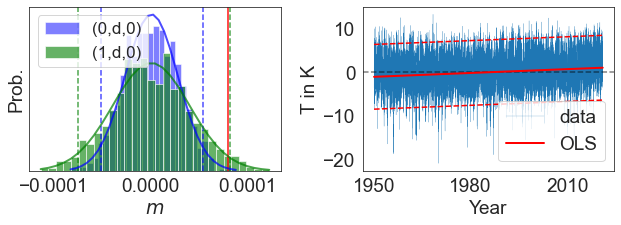

In [34]:
#two tailed test

rc('xtick', labelsize=19)
rc('ytick', labelsize=19)
rc('font', size=19)
rc('axes', labelsize=19)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 3.5), sharey=False)  
    
n, bins, patches = ax1.hist(trends, density=True, bins=30, color='b', alpha=0.5, label='(0,d,0)')      
na, binsa, patchesa = ax1.hist(a_tr, density=True, bins=30, color='g', alpha=0.6, label='(1,d,0)')  
ax1.set_ylabel('Prob.')
ax1.set_xlabel(r'$m$'); 
ax1.axvline(8.008e-05, color='r', ls='-', alpha=0.7, linewidth=2)
    
pred_ols = res.get_prediction()
iv_l = pred_ols.summary_frame()["obs_ci_lower"]
iv_u = pred_ols.summary_frame()["obs_ci_upper"]
    
ax2.set_ylabel('T in K')
ax2.set_xlabel('Year')
ax2.set_xticks([0, 30*365.25, 60*365.25]) 
ax2.set_xticklabels([1950, 1980, 2010])     

ax2.plot(temp, "-", linewidth=0.2, label="data")
ax2.axhline(0, color='k', ls='--', alpha=0.5)
ax2.plot(x, res.fittedvalues, "r-", linewidth=2, label="OLS")
ax2.plot(x, iv_u, "r--")
ax2.plot(x, iv_l, "r--")
ax2.legend(loc="best")

alpha = 0.95
p = ((1.0-alpha)/2.0) * 100
lower =  np.percentile(trends, p)
lowera =  np.percentile(a_tr, p)
p = (alpha + (1.0-alpha)/2.0) * 100
upper =  np.percentile(trends, p)
uppera =  np.percentile(a_tr, p)

ax1.axvline(lower, color='b', ls='--', alpha=0.7)
ax1.axvline(lowera, color='g', ls='--', alpha=0.7)
ax1.axvline(upper, color='b', ls='--', alpha=0.7)
ax1.axvline(uppera, color='g', ls='--', alpha=0.7)
ax1.legend(loc='upper left', fontsize=17)
ax1.set_yticks([])

(mu, sigma) = norm.fit(trends)
y = norm.pdf(bins, mu, sigma)
ax1.plot(bins, y, 'b-', linewidth=2, alpha=0.7)

(mua, sigmaa) = norm.fit(a_tr)
ya = norm.pdf(binsa, mua, sigmaa)
ax1.plot(binsa, ya, 'g-', linewidth=2, alpha=0.7)

f.tight_layout()

f.savefig('potsdam_arfima_hist_1950_2020_2.png', bbox_inches='tight', format='png', dpi=120)